In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj

In [173]:
sta = pd.read_csv('bj_station.csv',encoding = 'gb2312')

In [174]:
sta

,station_id,name_chinese,name_english,latitude,longitude,district_id
0,1001,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,101
1,1002,海淀北京植物园,HaiDianBeiJingZhiWuYuan,40.003950,116.205310,101
2,1003,石景山古城,ShiJingShanGuCheng,39.914409,116.184239,102
3,1004,丰台云岗,FengTaiYunGang,39.815128,116.171150,103
4,1005,房山良乡,FangShanLiangXiang,39.742767,116.136045,104
5,1006,海淀万柳,HaiDianWanLiu,39.987313,116.287451,101
6,1007,朝阳奥体中心,ChaoYangAoTiZhongXin,39.982053,116.397400,105
7,1008,西直门北大街,XiZhiMenBeiDaJie,39.954047,116.348991,101
8,1009,西城万寿西宫,XiChengWanShouXiGong,39.878193,116.351974,106
9,1010,永定门内大街,YongDingMenNeiDaJie,39.876184,116.394009,103


In [15]:
p1 = pyproj.Proj(init="epsg:4326") # 定义数据地理坐标系 WGS84
p2 = pyproj.Proj(init="epsg:3857") # 定义转换投影坐标系


In [25]:
lat_lon = []
for lat,lon in zip(sta['latitude'],sta['longitude']):
    tmp = []
    x, y = pyproj.transform(p1, p2, lon, lat) # lon 和lat 可以是元组
    tmp.append(x);tmp.append(y)
    lat_lon.append(tmp)

In [26]:
filepath = 'attention/'

[56.89297  54.17684  54.742116 54.76329  53.163335 52.20172  54.853242
 54.34824  54.34508  53.97785  57.179615 56.38826  54.9176   52.794613
 54.517083 54.74678  53.901892 56.319844]


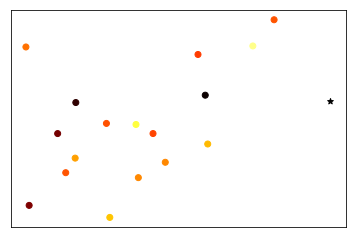

In [96]:
lat_lon = np.array(lat_lon)
source = np.array([0, 3, 4, 5, 6, 9, 11, 16, 17, 18, 22, 24, 26, 27, 30, 31, 34, 35])
target = [32]
sta_atten = pd.read_csv(filepath + 'attention0.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[-170,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

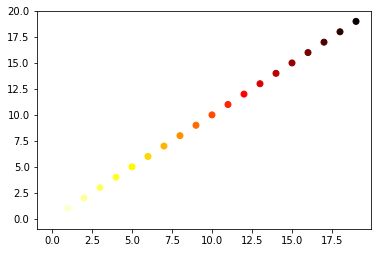

In [64]:
plt.scatter(range(20),range(20),c = range(20),cmap = plt.cm.hot_r)

[52.458394 53.152174 58.238104 56.226462 55.082526 54.675713 53.717747
 54.68789  54.260623 53.01554  54.402743 54.402895 55.154994 55.878088
 54.29535  55.031616 54.42234  54.409668]


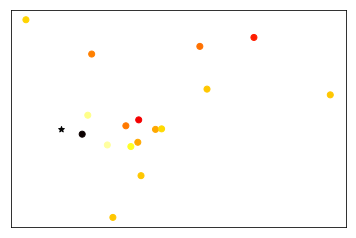

In [95]:
source = np.array([0, 1, 2, 6, 7, 9, 10, 11, 13, 15, 16, 22, 26, 27, 28, 29, 32, 34])
target = [24]
sta_atten = pd.read_csv(filepath + 'attention1.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[-170,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[56.308467 56.12302  57.333242 57.353012 58.580965 58.071017 58.802065
 58.101725 58.249883 59.161626 58.63233  58.73049  58.14281  58.42953
 58.971483 58.65285  58.430824 58.017753]


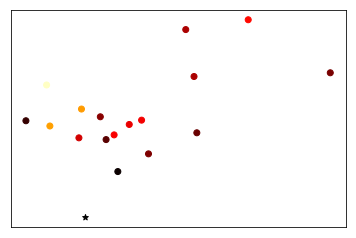

In [94]:
source = np.array([0, 1, 2, 5, 7, 9, 10, 13, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27])
target = [34]
sta_atten = pd.read_csv(filepath + 'attention2.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[-170,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[58.40147  57.897773 57.79998  58.55997  57.035208 58.55519  58.19288
 55.304337 57.84068  57.820175 57.0351   57.970867 58.608327 58.66015
 58.903072 58.853097 58.41693  58.223333]


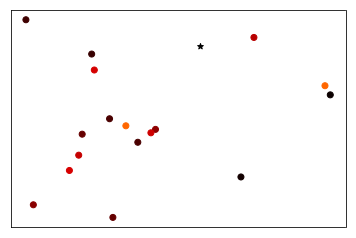

In [93]:
source = np.array( [2, 3, 4, 5, 7, 9, 11, 17, 21, 23, 25, 27, 28, 29, 32, 33, 34, 35])
target = [26]
sta_atten = pd.read_csv(filepath + 'attention3.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[-170,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[56.76573  55.859312 57.180792 55.52188  57.37383  56.805834 57.063773
 58.024496 56.735735 56.882545 56.705873 56.775868 56.707755 56.81342
 56.186896 56.48219  56.783583 57.76028 ]


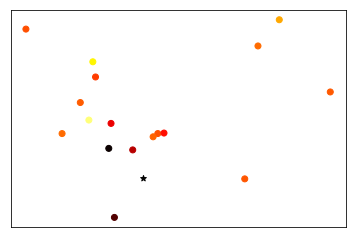

In [103]:
source = np.array( [0, 1, 5, 9, 10, 11, 13, 15, 21, 23, 24, 25, 27, 28, 29, 31, 33, 34])
target = [16]
sta_atten = pd.read_csv(filepath + 'attention4.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[10,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[56.51268  56.56403  56.52794  56.712724 55.026155 55.78046  55.64683
 55.158976 55.249687 54.49563  54.53348  55.574477 55.797026 55.418357
 55.532053 55.69496  56.34466  55.456676]


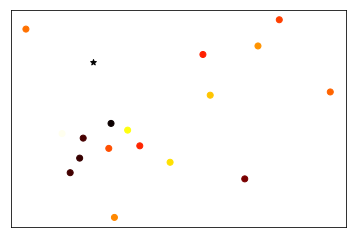

In [113]:
source = np.array([2, 3, 4, 5, 7, 9, 15, 17, 22, 23, 24, 25, 26, 27, 28, 31, 33, 34])
target = [29]
sta_atten = pd.read_csv(filepath + 'attention4.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[20,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[56.493487 57.80182  57.434294 57.586167 58.346838 57.121377 58.07298
 57.239737 54.240666 57.22868  57.789873 57.389334 58.135636 56.890108
 57.16224  57.780683 57.614677 56.09941 ]


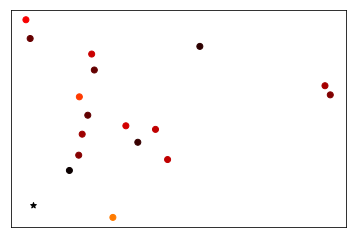

In [122]:
source = np.array([0, 1, 2, 3, 4, 7, 9, 11, 15, 17, 23, 25, 26, 28, 29, 30, 32, 34])
target = [35]
sta_atten = pd.read_csv(filepath + 'attention5.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[90,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[55.608504 55.58551  55.432267 55.709485 55.31831  54.86933  53.681727
 53.70372  57.50726  55.224564 55.815775 55.389676 53.943496 54.81473
 55.561814 55.5859   55.320438 54.572433]


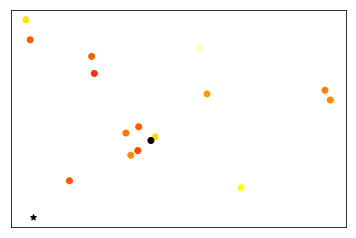

In [137]:
source = np.array([4, 6, 7, 9, 10, 11, 13, 16, 21, 22, 23, 25, 26, 28, 29, 30, 32, 33])
target = [35]
sta_atten = pd.read_csv(filepath + 'attention5.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[10,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[56.220524 55.36171  56.224972 56.21843  56.626435 56.23657  54.678515
 57.325225 57.001516 56.93638  56.517772 57.029765 57.139896 56.924544
 59.18134  56.55135  57.243384 53.39795 ]


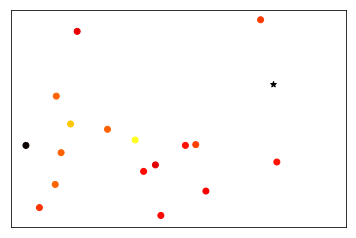

In [143]:
source = np.array([0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 18, 24, 26, 29, 33])
target = [22]
sta_atten = pd.read_csv(filepath + 'attention6.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[100,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[55.743985 55.05008  55.04889  55.98263  56.173522 56.358006 55.72674
 54.631107 55.44672  54.950763 55.529043 55.61501  56.466445 55.968318
 56.926817 56.876715 56.752484 56.546368]


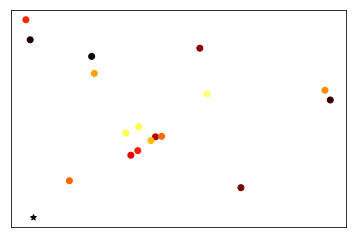

In [160]:
source = np.array([4, 6, 7, 9, 10, 11, 13, 16, 21, 22, 23, 25, 26, 28, 29, 30, 32, 33])
target = [35]
sta_atten = pd.read_csv(filepath + 'attention7.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[39,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[55.015538 53.483788 55.2614   53.69056  54.36543  54.469343 55.626158
 53.385373 55.72827  54.596238 54.28493  56.450486 55.67397  59.173394
 54.249045 56.48514  53.192895 52.76047 ]


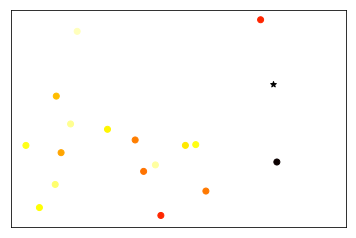

In [167]:
source = np.array([0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 18, 24, 26, 29, 33])
target = [22]
sta_atten = pd.read_csv(filepath + 'attention8.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[70,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

[56.769386 56.418072 56.408487 57.45046  58.29352  57.172183 61.09629
 58.315456 57.8619   58.527485 58.30582  57.432704 53.261306 58.07781
 60.240325 57.256814 54.434687 57.974588]


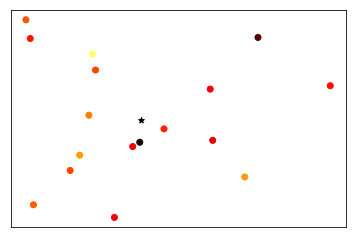

In [172]:
source = np.array([1, 33, 3, 4, 34, 35, 9, 10, 13, 18, 22, 23, 24, 25, 27, 28, 29, 30])
target = [6]
sta_atten = pd.read_csv(filepath + 'attention9.csv')
sta_atten = sta_atten.values[1:,1:]
score = sta_atten[120,:] * 1000
print(score)
plt.xticks([])
plt.yticks([])
plt.scatter(lat_lon[target,0],lat_lon[target,1],c='black',marker ='*')
plt.scatter(lat_lon[source,0],lat_lon[source,1],c = score,cmap = plt.cm.hot_r)

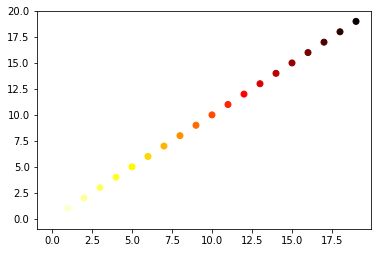

In [54]:
plt.scatter(range(20),range(20),c = range(20),cmap = plt.cm.hot_r)